In [40]:
pip install matplotlib


In [41]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


Load dữ liệu

In [44]:
import pandas as pd

data = pd.read_csv("diabetes.csv")

print(data.head())
print(data.info())
print(data.isnull().sum())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

Tính các đặt trưng thống kế

In [45]:
print(data.describe())
print(data.std())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [46]:
#Kiểm tra giá trị null
data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Phân bố của các biến


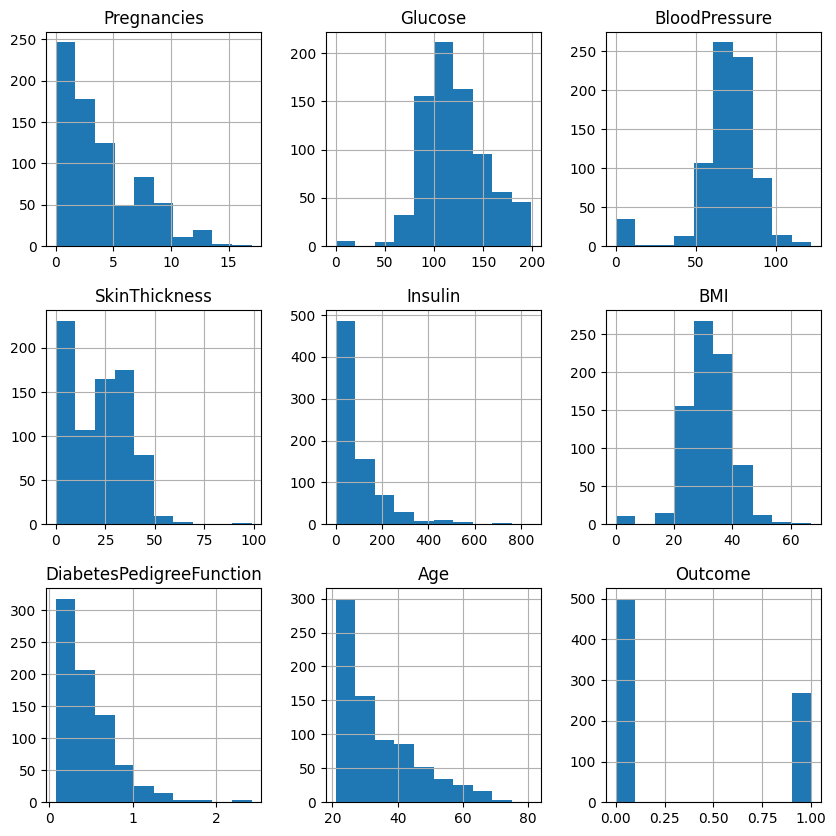

In [47]:
import matplotlib.pyplot as plt

data.hist(figsize=(10, 10))
plt.show()


Outliers

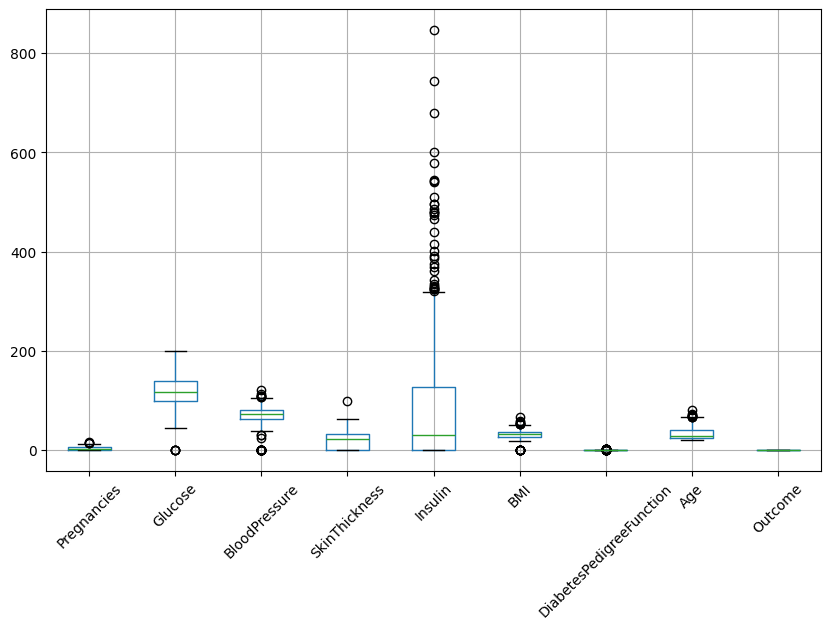

In [48]:
plt.figure(figsize=(10, 6))
data.boxplot()
plt.xticks(rotation=45)
plt.show()


Tương quan giữa các biến

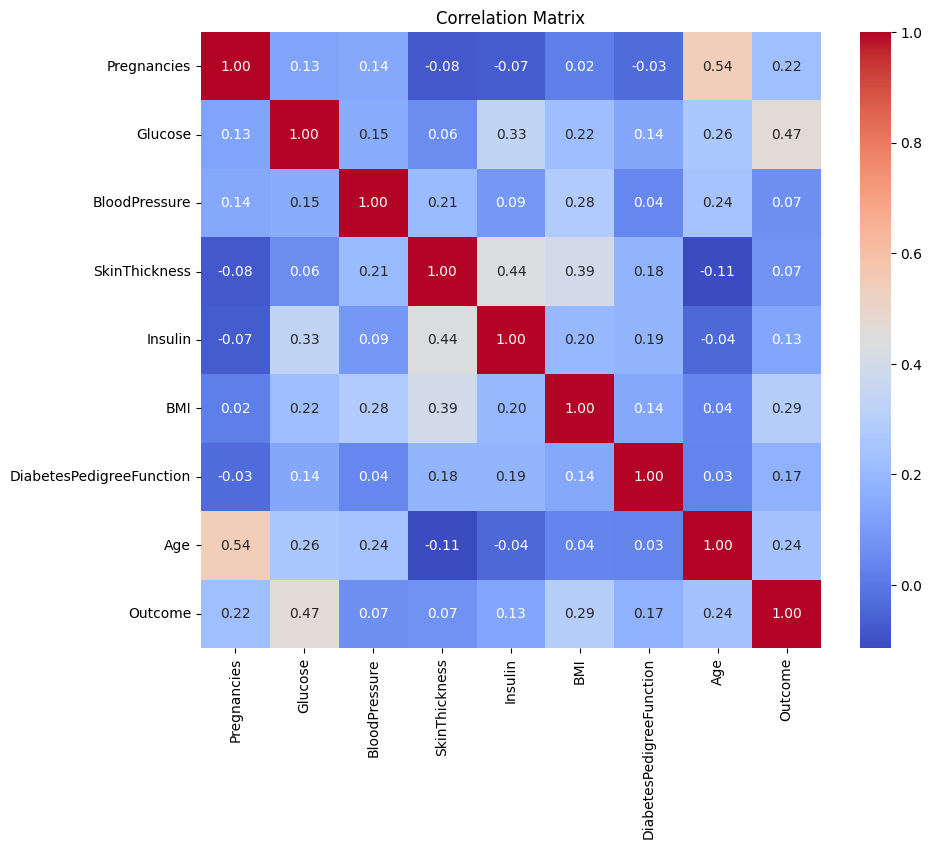

In [49]:
correlation_matrix = data.corr()

import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Tiền xử lý dữ liệu

In [50]:
# Xử lý outliers.
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [51]:
# Chuẩn hoá dữ liệu
from sklearn.preprocessing import StandardScaler

X = data.drop('Outcome', axis=1)
y = data['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
# Xử lý dữ liệu mất cân đối
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


Chia dữ liệu

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Kích thước tập huấn luyện:", X_train.shape[0])
print("Kích thước tập kiểm tra:", X_test.shape[0])



Kích thước tập huấn luyện: 702
Kích thước tập kiểm tra: 176


Huấn luyện mô hình học sâu

In [54]:
from keras.models import Sequential
from keras.layers import Dense
# Tạo mô hình mạng nơ-ron để chuyển đổi thông tin
deep_model = Sequential()
deep_model.add(Dense(12, input_dim=8, activation='relu'))
deep_model.add(Dense(8, activation='relu'))
deep_model.add(Dense(1, activation='sigmoid'))  # Số lượng units trong lớp cuối cùng là 1
deep_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

deep_model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=0)

X_train_transformed = deep_model.predict(X_train)
X_test_transformed = deep_model.predict(X_test)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Huấn luyện mô hình học máy

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Tính toán các chỉ số đánh giá cho Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='macro')
rf_recall = recall_score(y_test, rf_pred, average='macro')
rf_f1 = f1_score(y_test, rf_pred, average='macro')

print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-Score:", rf_f1)

# Mô hình Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Tính toán các chỉ số đánh giá cho Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='macro')
lr_recall = recall_score(y_test, lr_pred, average='macro')
lr_f1 = f1_score(y_test, lr_pred, average='macro')

print("\nLogistic Regression Metrics:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-Score:", lr_f1)

# Mô hình Support Vector Machine
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Tính toán các chỉ số đánh giá cho Support Vector Machine
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='macro')
svm_recall = recall_score(y_test, svm_pred, average='macro')
svm_f1 = f1_score(y_test, svm_pred, average='macro')

print("\nSupport Vector Machine Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-Score:", svm_f1)



Random Forest Metrics:
Accuracy: 0.8636363636363636
Precision: 0.8646412411118294
Recall: 0.8646412411118294
F1-Score: 0.8636363636363636

Logistic Regression Metrics:
Accuracy: 0.75
Precision: 0.7518037518037518
Recall: 0.7481577246283129
F1-Score: 0.7484080571799869

Support Vector Machine Metrics:
Accuracy: 0.7556818181818182
Precision: 0.7581578947368421
Recall: 0.7536522301228183
F1-Score: 0.7538941823030145


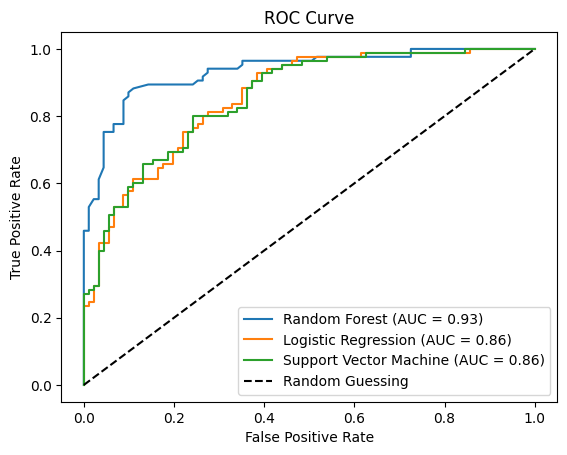

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Tính toán ROC và AUC cho mô hình Random Forest
rf_probs = rf_model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# Vẽ biểu đồ ROC cho mô hình Random Forest
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_auc)

# Tính toán ROC và AUC cho mô hình Logistic Regression
lr_probs = lr_model.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Vẽ biểu đồ ROC cho mô hình Logistic Regression
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = %0.2f)' % lr_auc)

# Tính toán ROC và AUC cho mô hình Support Vector Machine
svm_probs = svm_model.decision_function(X_test)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

# Vẽ biểu đồ ROC cho mô hình Support Vector Machine
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine (AUC = %0.2f)' % svm_auc)

# Đường chéo tham chiếu
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Đặt tiêu đề và chú thích
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [57]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import joblib


estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression()),
    ('svm', SVC(kernel='linear', C=1, random_state=42))
]

# Mô hình stacking
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacking_model.fit(X_train, y_train)
joblib.dump(stacking_model, 'stacking_model.pkl')
# Mô hình stacking-DNN
stacking_model_2 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model_2.fit(X_train_transformed, y_train)
joblib.dump(stacking_model_2, 'stacking_model_2.pkl')


['stacking_model_2.pkl']

In [58]:
from sklearn.metrics import accuracy_score

y_pred_stacked = stacking_model.predict(X_test)
print(y_pred_stacked)
print(y_test)

accuracy_stacked = accuracy_score(y_test, y_pred_stacked)
print("Stacking Model Accuracy:", accuracy_stacked)
y_pred_stacked = stacking_model_2.predict(X_test_transformed)
accuracy_stacked_2 = accuracy_score(y_test, y_pred_stacked)
print("Stacking Model Accuracy-DNN:", accuracy_stacked_2)

[1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0
 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0]
331    0
247    0
789    1
316    1
215    1
      ..
581    0
239    1
483    0
351    0
81     0
Name: Outcome, Length: 176, dtype: int64
Stacking Model Accuracy: 0.8636363636363636
Stacking Model Accuracy-DNN: 0.7897727272727273


Đánh giá hiệu suất

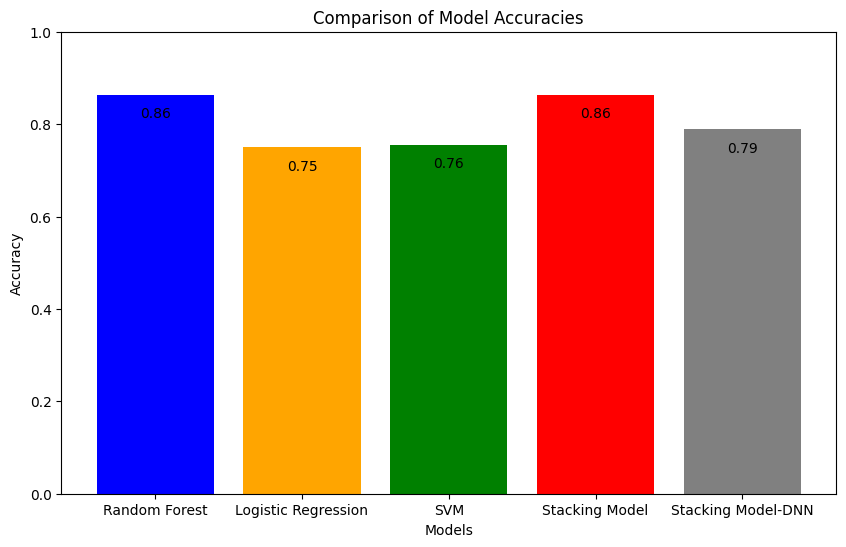

In [59]:
import matplotlib.pyplot as plt

accuracies = [rf_accuracy, lr_accuracy, svm_accuracy]

accuracies.append(accuracy_stacked)
accuracies.append(accuracy_stacked_2)


models = ['Random Forest', 'Logistic Regression', 'SVM', 'Stacking Model','Stacking Model-DNN']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red','gray'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{accuracy:.2f}', ha='center', color='black', fontsize=10)

plt.show()
